### Importing basic libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

### Lets generate some  <span style="color:green">balanced</span>  data using sklearn dataset 

In [2]:
X, y = make_classification(n_samples=10000, 
                           n_features=4, 
                           n_redundant=0, 
                           random_state=42, 
                           weights=[0.5])

Text(0, 0.5, 'y Feature')

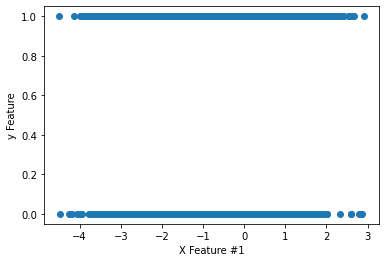

In [3]:
import matplotlib.pyplot as plt
## Feature1 Vs y 
plt.scatter(X[:,0],y)
plt.xlabel("X Feature #1")
plt.ylabel("y Feature")

In [4]:
#Create a dataframe, will be easy to handle 
columns = [f'feat_{i+1}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=columns)
y = pd.DataFrame(y, columns=['label'])
df = X.merge(y,left_index=True, right_index=True)

In [5]:
df.head(2)

,feat_1,feat_2,feat_3,feat_4,label
0,1.301762,-0.321127,-0.293690,0.913329,0
1,-2.458346,-0.828764,1.377577,-1.214044,0


In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
lreg_model = LogisticRegression()
lreg_model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = lreg_model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

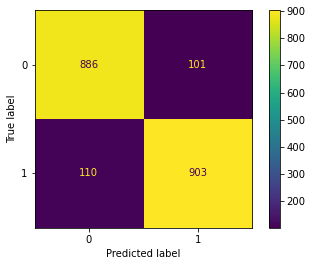

In [11]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [16]:
from sklearn.metrics import precision_score,recall_score, f1_score
print( "Precision score:",precision_score(y_test, y_pred) )

Precision score: 0.899402390438247


In [17]:
print( "Recall score",recall_score(y_test, y_pred))

Recall score 0.8914116485686081


In [18]:
print("F1 score",f1_score(y_test, y_pred))

F1 score 0.8953891918691125


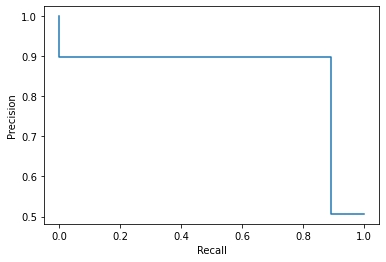

In [19]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
prec, recall,_ = precision_recall_curve(y_test, y_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

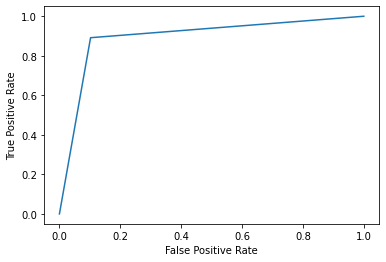

In [20]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, y_pred)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Lets repeat the same exercise using  <span style="color:red">"un-balanced"</span> data using sklearn dataset 

Text(0, 0.5, 'y Feature')

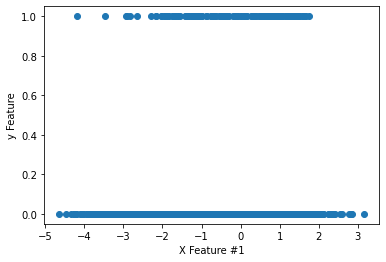

In [39]:
X1, y1 = make_classification(n_samples=10000, 
                           n_features=4, 
                           n_redundant=0, 
                           random_state=42, 
                           weights=[0.95])
## Feature_1 Vs y 
plt.scatter(X1[:,0],y)
plt.xlabel("X Feature #1")
plt.ylabel("y Feature")

In [40]:
#Create a dataframe, will be easy to handle 
columns = [f'feat_{i+1}' for i in range(X.shape[1])]
X1 = pd.DataFrame(X1, columns=columns)
y1 = pd.DataFrame(y1, columns=['label'])
df = X1.merge(y1,left_index=True, right_index=True)
df.head(2)

,feat_1,feat_2,feat_3,feat_4,label
0,1.301762,-0.321127,-0.293690,0.913329,0
1,-2.458346,-0.828764,1.377577,-1.214044,0


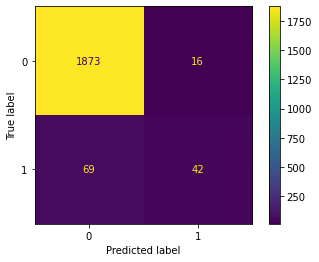

In [41]:
X1 = df.iloc[:,:-1].values
y1 = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
lreg_model = LogisticRegression()
lreg_model.fit(X1_train, y1_train)
y1_pred = lreg_model.predict(X1_test)
cm = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(cm).plot()

In [42]:
from sklearn.metrics import precision_score,recall_score, f1_score
print( "Precision score:",precision_score(y1_test, y1_pred) )

Precision score: 0.7241379310344828


In [43]:
print( "Recall score",recall_score(y1_test, y1_pred))

Recall score 0.3783783783783784


In [44]:
print("F1 score",f1_score(y1_test, y1_pred))

F1 score 0.49704142011834324


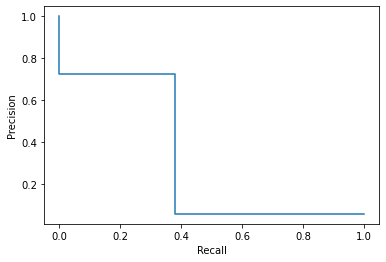

In [45]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
prec, recall,_ = precision_recall_curve(y1_test, y1_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

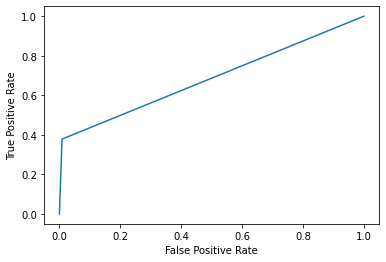

In [46]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, _ = roc_curve(y1_test, y1_pred)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()